# Cost function plot

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.special import expit
from sklearn.metrics import mean_squared_error
from math import sqrt

np.random.seed(0)

In [2]:
xmin = 0.01
xmax = 10
w1min = 4.95
w1max = 5.05
w2min = 0
w2max = 10

xres = 20
w1res = 1000
w2res = 5000

X_data = np.linspace(xmin, xmax, xres)
y_data = np.polynomial.polynomial.polyval(X_data, [0, 2, 5]) + np.sin(8*X_data) + 0.5 * np.random.normal(size=xres)

w1_range = np.linspace(w1min, w1max, w1res)
w2_range = np.linspace(w2min, w2max, w2res)
W1, W2 = np.meshgrid(w1_range, w2_range)

In [3]:
def weight_multiply(w,x):
    return np.kron(w.flatten(), x).reshape(w2res, w1res, xres)

In [4]:
def cost(wa, wb):
    y_reg = 2 * X_data + weight_multiply(wa, np.square(X_data)) + np.sin(weight_multiply(wb, X_data))
    y_data_tiled = np.tile(y_data, (w2res, w1res, 1))
    return np.sqrt(np.square(y_reg - y_data_tiled).mean(axis=2)) # reimplement rmse...

Z = cost(W1, W2)

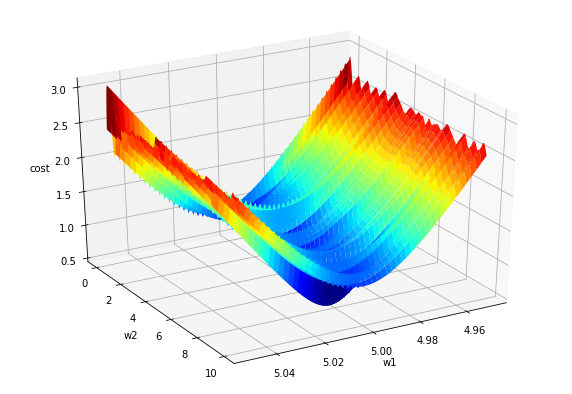

In [5]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W2, Z, color='b', cmap=cm.jet)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.view_init(30, 60)
plt.draw()

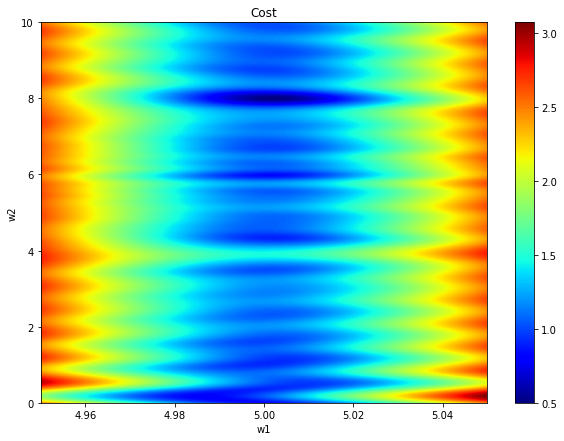

In [6]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
im = ax.pcolormesh(W1, W2, Z, cmap=cm.jet)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Cost')
fig.colorbar(im, ax=ax)
plt.show()